In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn. model_selection import train_test_split

In [4]:
df = pd.read_csv('online_shoppers_intention.csv', delimiter=',')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Вообще конверсия - это число реальных купивших что-то, деленное на число потенциальных покупателей. Но по имеющимся данным нельзя сказать, как нам не учитывать каких-то пользователей дважды (то есть VisitorType == Returning_Visitor), поэтому анализ проведен в таком виде

In [25]:
Region_Revenue = df.groupby(['Region'])['Revenue'].sum()


CR = Region_Revenue /  df.groupby(['Region'])['Region'].count()

 #Конверсия
print('      CR: \n', round(CR, 3))



      CR: 
 Region
9    0.168
2    0.165
5    0.164
1    0.161
7    0.156
4    0.148
3    0.145
6    0.139
8    0.129
dtype: float64


In [27]:
print('      Число пользователей: \n', df.groupby(['Region'])['Region'].count())

      Число пользователей: 
 Region
1    4780
2    1136
3    2403
4    1182
5     318
6     805
7     761
8     434
9     511
Name: Region, dtype: int64


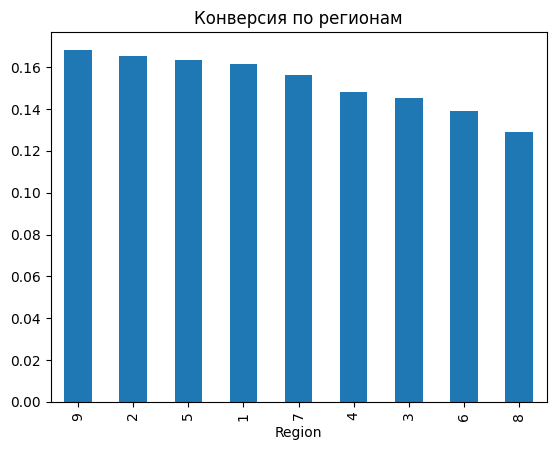

In [42]:
plt.title('Конверсия по регионам')

CR.plot(kind="bar")

plt.show()

Можно заметить, что несмотря на то, что в девятом регионе меньше всего посетителей, его конверсия самая высокая.
Это говорит о том, что данный регион самый успешный. В то же время, несмотря на то, что третий регион является одним из самых
активных по посетителям, его конверсия не такая высокая. Следовательно, можно было бы предложить сфокусировать свое внимание на
3 - ем регионе, чтобы повысить его конверсию

      visitors_in_Month: 
 Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
Name: Month, dtype: int64
      CR: 
 Region
9    0.168
2    0.165
5    0.164
1    0.161
7    0.156
4    0.148
3    0.145
6    0.139
8    0.129
dtype: float64


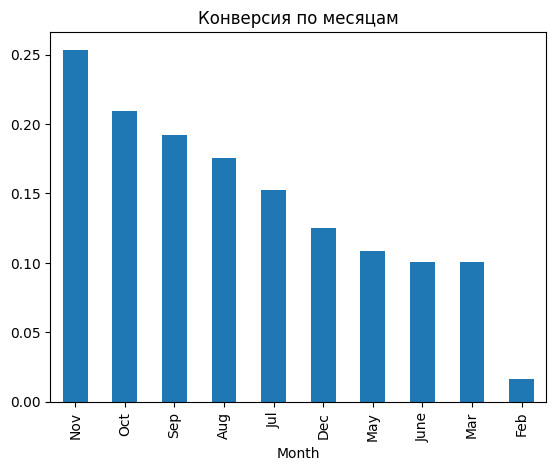

In [43]:
month_Revenue = df.groupby(['Month'])['Revenue'].sum()
visitors_in_month = df.groupby(['Month'])['Month'].count()
print('      visitors_in_Month: \n', visitors_in_month)

CR_month = (month_Revenue / visitors_in_month).sort_values(ascending=False) #Конверсия
print('      CR: \n', round(CR, 3))

plt.title('Конверсия по месяцам')

CR_month.plot(kind="bar")

plt.show()

In [45]:
Special_Days_in_Month = df.groupby(['Month'])['SpecialDay'].sum()
Special_Days_in_Month.sort_values(ascending = False)

Month
May     714.4
Feb      43.0
Aug       0.0
Dec       0.0
Jul       0.0
June      0.0
Mar       0.0
Nov       0.0
Oct       0.0
Sep       0.0
Name: SpecialDay, dtype: float64

Можно заметить, что в мае было очень большое число посетителей, но конверсия очень маленькая, возможно это как-то связано с какими-то специальными днями?

Бизнесс аналитика: Добавить скидки, акции, специальные предложения в Феврале.

      visitors_in_OS: 
 OperatingSystems
1    2585
2    6601
3    2555
4     478
5       6
6      19
7       7
8      79
Name: OperatingSystems, dtype: int64
      CR: 
 Region
9    0.168297
2    0.165493
5    0.163522
1    0.161297
7    0.156373
4    0.148054
3    0.145235
6    0.139130
8    0.129032
dtype: float64


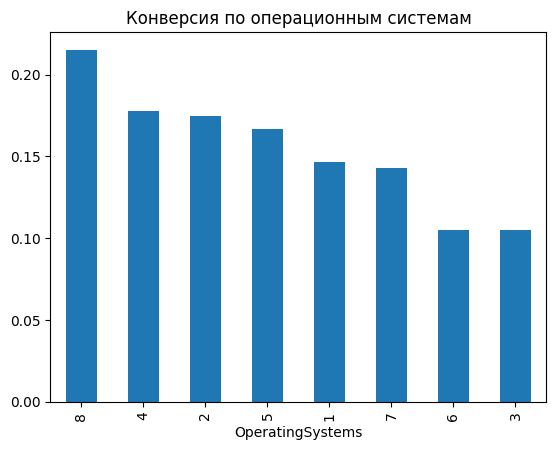

In [48]:
OS_Revenue = df.groupby(['OperatingSystems'])['Revenue'].sum()
visitors_in_OS = df.groupby(['OperatingSystems'])['OperatingSystems'].count()
print('      visitors_in_OS: \n',visitors_in_OS)


CR_OS = (OS_Revenue/visitors_in_OS).sort_values(ascending=False) #Конверсия
print('      CR: \n',CR)

plt.title('Конверсия по операционным системам')

CR_OS.plot(kind="bar")

plt.show()

In [50]:
# Наиболее часто используемая OS в каждом регионе
df.groupby(['Region'])['OperatingSystems'].agg(pd.Series.mode)

Region
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: OperatingSystems, dtype: int64

In [51]:
# Наиболее часто используемая браузеры в каждом регионе
df.groupby(['Region'])['Browser'].agg(pd.Series.mode)

Region
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Browser, dtype: int64

# Model

In [60]:
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

Как видим, данные несбалансированны, поэтому когда будем делить данные на обучающие и тестовые, то будет стратифицировать по таргету

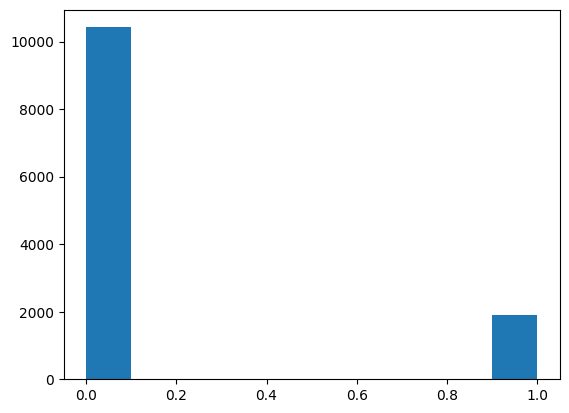

In [81]:
plt.hist(df['Revenue'].apply(int))
plt.show()

In [84]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Revenue'])

In [90]:
X_train = train.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)
y_train = train['Revenue']

In [91]:
X_test = test.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)
y_test = test['Revenue']

In [92]:
print(y_train.shape[0])
print(sum(y_train))

9864
1526


In [93]:
print(y_test.shape[0])
sum(y_test)

2466


382

По хорошему надо добавить месяц, чтобы учитывать сезонность, но в качестве базовой модели можно взять только числовые признаки

In [94]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Так как выборка несбалансированна, то такие метрики как точность и roc_auc будут выдавать завышенные результаты, так что в качестве альтернативы можно смотреть на метрики precision, recall, f1 и average_precision_score

In [95]:
model.score(X_test, y_test)

0.8933495539334956

In [96]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8922374159640641

In [97]:
average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

0.6926878949855848

In [98]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2084
        True       0.71      0.52      0.60       382

    accuracy                           0.89      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.89      0.89      2466



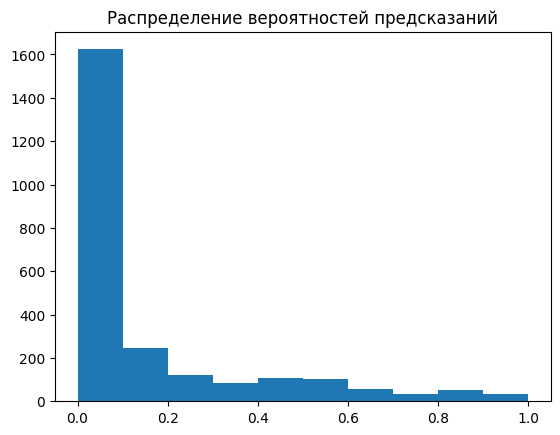

In [100]:
plt.title('Распределение вероятностей предсказаний')

plt.hist(model.predict_proba(X_test)[: , 1])

plt.show()